In [1]:
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np
import csv
from copy import deepcopy

algorithms= ["Metis", "EmbedBalanced", "EmbedPartition",
             "EmbedGreedy", "RandomPlacer","RoundRobin",
             "SwitchBinPlacer"]

labels = ['K', 'CORES','MEMORY','RATE','DENSITY',
                   "EMBEDGREEDY_HOSTS", "EMBEDBALANCED_HOSTS", "EMBEDPARTITION_HOSTS", "METIS_HOSTS",
                  "METIS_HOST_CPU_OVERCOMMITMENT", "METIS_HOST_MEMORY_OVERCOMMITMENT", "METIS_HOST_LINK_OVERCOMMITMENT","METIS_MAX_CPU_OVERCOMMITMENT", "METIS_MAX_MEMORY_OVERCOMMITMENT", "METIS_MAX_LINK_OVERCOMMITMENT",
                  "RANDOM_HOSTS","RANDOM_HOST_CPU_OVERCOMMITMENT", "RANDOM_HOST_MEMORY_OVERCOMMITMENT", "RANDOM_HOST_LINK_OVERCOMMITMENT","RANDOM_MAX_CPU_OVERCOMMITMENT", "RANDOM_MAX_MEMORY_OVERCOMMITMENT", "RANDOM_MAX_LINK_OVERCOMMITMENT",
                  "ROUNDROBIN_HOSTS","ROUNDROBIN_HOST_CPU_OVERCOMMITMENT", "ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_HOST_LINK_OVERCOMMITMENT","ROUNDROBIN_MAX_CPU_OVERCOMMITMENT", "ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_MAX_LINK_OVERCOMMITMENT",
                  "SWITCHBIN_HOSTS", "SWITCHBIN_HOST_CPU_OVERCOMMITMENT", "SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT", "SWITCHBIN_HOST_LINK_OVERCOMMITMENT","SWITCHBIN_MAX_CPU_OVERCOMMITMENT", "SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT", "SWITCHBIN_MAX_LINK_OVERCOMMITMENT"]




experiment_key = namedtuple("experiment_key", labels[:5])
experiment_results= namedtuple("experiment_results", labels[5:])
e=experiment_key(2,2,4,2,2)
clened_data={}
with open('pkl/Lyon_fattree.csv') as File:
    reader = csv.reader(File, delimiter=';', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    
    for row in list(reader)[1:]:
        #print(row)
        key_= experiment_key(*[float(i.replace(",",".")) for i in row[:5]])
        #print(key_)
        results_ = experiment_results(*[float(i.replace(",",".")) if float(i.replace(",",".")) >= 0 else -1 for i in row[5:]])
        #print(results_)
        clened_data[key_]=results_

filtered_data=dict()
for key in clened_data.keys():
    if clened_data[key].EMBEDGREEDY_HOSTS>0:
        filtered_data[key]=clened_data[key]
print(len(clened_data.keys()))

print(len(filtered_data.keys()))
fattree_cleaned_data=clened_data



1260
438


In [2]:
#print(clened_data.values())
print("Embedded Greedy solved")
fattree_eg_solved=list(filter(lambda x:clened_data[x].EMBEDGREEDY_HOSTS>0, clened_data.keys()))
print(len(fattree_eg_solved))
print("-------------------------")

print("Embedded Balanced solved")
fattree_eb_solved=list(filter(lambda x:clened_data[x].EMBEDBALANCED_HOSTS>0, clened_data.keys()))
print(len(fattree_eb_solved))
print("-------------------------")

print("Embedded Partition solved")
fattree_ep_solved=list(filter(lambda x:clened_data[x].EMBEDPARTITION_HOSTS>0, clened_data.keys()))
print(len(fattree_ep_solved))
print("-------------------------")

print("Metis solved without overcommitment")
fattree_metis_solved=list(filter(lambda x:clened_data[x].METIS_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_metis_solved))
print("-------------------------")

print("Random solved without overcommitment")
fattree_random_solved=list(filter(lambda x:clened_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_random_solved))
print("-------------------------")

print("RoundRobin solved without overcommitment")
fattree_roundrobin_solved = list(filter(lambda x:clened_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_roundrobin_solved))
print("-------------------------")

print("SwitchBin solved without overcommitment")
fattree_switchBin_solved = list(filter(lambda x:clened_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_switchBin_solved))
print("-------------------------")

print("All solution Marged")
fattree_all_solution_marged=set(fattree_eg_solved+fattree_eb_solved+fattree_ep_solved+fattree_metis_solved+fattree_random_solved+fattree_roundrobin_solved+fattree_switchBin_solved)
print(len(fattree_all_solution_marged))
print("-------------------------")

print("All solution with solution for all the algos")
fattree_instances_with_solution_for_all= fattree_all_solution_marged.intersection(set(fattree_eg_solved),set(fattree_eb_solved),set(fattree_ep_solved),set(fattree_metis_solved),set(fattree_random_solved),set(fattree_roundrobin_solved),set(fattree_switchBin_solved))
print(len(fattree_instances_with_solution_for_all))
print("-------------------------")


print("Embedded Greedy solved %")
print(len(fattree_eg_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Balanced solved %")
print(len(fattree_eb_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Partition solved %")
print(len(fattree_ep_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Metis solved %")
print(len(fattree_metis_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Random solved %")
print(len(fattree_random_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("RoundRobin solved %")
print(len(fattree_roundrobin_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("SwitchBin solved %")
print(len(fattree_switchBin_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("All algo solved %")
print(len(fattree_instances_with_solution_for_all)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

Embedded Greedy solved
438
-------------------------
Embedded Balanced solved
420
-------------------------
Embedded Partition solved
426
-------------------------
Metis solved without overcommitment
205
-------------------------
Random solved without overcommitment
36
-------------------------
RoundRobin solved without overcommitment
46
-------------------------
SwitchBin solved without overcommitment
252
-------------------------
All solution Marged
438
-------------------------
All solution with solution for all the algos
22
-------------------------
Embedded Greedy solved %
100.0 %
-------------------------
Embedded Balanced solved %
95.8904109589041 %
-------------------------
Embedded Partition solved %
97.26027397260275 %
-------------------------
Metis solved %
46.80365296803653 %
-------------------------
Random solved %
8.21917808219178 %
-------------------------
RoundRobin solved %
10.50228310502283 %
-------------------------
SwitchBin solved %
57.534246575342465 %
-------

In [3]:
def get_data_ft(dataset,K=None,DENSITY=None,CORES=None,MEMORY=None,RATE=None):
    keys=list(dataset.keys())
    
    if K != None:
        keys=list(filter(lambda x: x.K == K, keys))
        
    if DENSITY != None:
        keys=list(filter(lambda x: x.DENSITY == DENSITY, keys))
        
    if CORES != None:
        keys=list(filter(lambda x: x.CORES == CORES, keys))
        
    if MEMORY != None:
        keys=list(filter(lambda x: x.MEMORY == MEMORY, keys))
        
    if RATE != None:
        keys=list(filter(lambda x: x.RATE == RATE, keys))
    
    data_retrived={}
    for k in keys:
        data_retrived[k]=dataset[k]
        
    return data_retrived

In [4]:
def get_data_rd(dataset,K=None,DENSITY=None,CORES=None,MEMORY=None,RATE=None):
    keys=list(dataset.keys())
    
    if K != None:
        keys=list(filter(lambda x: x.N == N, keys))
        
    if DENSITY != None:
        keys=list(filter(lambda x: x.DENSITY == DENSITY, keys))
        
    if SEED != None:
        keys=list(filter(lambda x: x.SEED == SEED, keys))
    
    data_retrived={}
    for k in keys:
        data_retrived[k]=dataset[k]
        
    return data_retrived


In [5]:
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np
import csv
from copy import deepcopy

algorithms= ["Metis", "EmbedBalanced", "EmbedPartition",
             "EmbedGreedy", "RandomPlacer","RoundRobin",
             "SwitchBinPlacer"]

labels = ['N', 'DENSITY', 'SEED',
                   "EMBEDGREEDY_HOSTS", "EMBEDBALANCED_HOSTS", "EMBEDPARTITION_HOSTS", "METIS_HOSTS",
                  "METIS_HOST_CPU_OVERCOMMITMENT", "METIS_HOST_MEMORY_OVERCOMMITMENT", "METIS_HOST_LINK_OVERCOMMITMENT","METIS_MAX_CPU_OVERCOMMITMENT", "METIS_MAX_MEMORY_OVERCOMMITMENT", "METIS_MAX_LINK_OVERCOMMITMENT",
                  "RANDOM_HOSTS","RANDOM_HOST_CPU_OVERCOMMITMENT", "RANDOM_HOST_MEMORY_OVERCOMMITMENT", "RANDOM_HOST_LINK_OVERCOMMITMENT","RANDOM_MAX_CPU_OVERCOMMITMENT", "RANDOM_MAX_MEMORY_OVERCOMMITMENT", "RANDOM_MAX_LINK_OVERCOMMITMENT",
                  "ROUNDROBIN_HOSTS","ROUNDROBIN_HOST_CPU_OVERCOMMITMENT", "ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_HOST_LINK_OVERCOMMITMENT","ROUNDROBIN_MAX_CPU_OVERCOMMITMENT", "ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_MAX_LINK_OVERCOMMITMENT",
                  "SWITCHBIN_HOSTS", "SWITCHBIN_HOST_CPU_OVERCOMMITMENT", "SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT", "SWITCHBIN_HOST_LINK_OVERCOMMITMENT","SWITCHBIN_MAX_CPU_OVERCOMMITMENT", "SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT", "SWITCHBIN_MAX_LINK_OVERCOMMITMENT"]




experiment_key = namedtuple("experiment_key", labels[:3])
experiment_results= namedtuple("experiment_results", labels[3:])
e=experiment_key(2,0.1,4)
clened_data={}
with open('pkl/Lyon_random.csv') as File:
    reader = csv.reader(File, delimiter=';', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    
    for row in list(reader)[1:]:
        #print(row)
        key_= experiment_key(*[float(i.replace(",",".")) for i in row[:3]])
        #print(key_)
        results_ = experiment_results(*[float(i.replace(",",".")) if float(i.replace(",",".")) >= 0 else -1 for i in row[3:]])
        #print(results_)
        clened_data[key_]=results_

filtered_data=dict()
for key in clened_data.keys():
    if clened_data[key].EMBEDGREEDY_HOSTS>0:
        filtered_data[key]=clened_data[key]
print(len(clened_data.keys()))

print(len(filtered_data.keys()))

random_cleaned_data=clened_data



4500
1704


In [6]:
print("Embedded Greedy solved")
random_eg_solved=list(filter(lambda x:clened_data[x].EMBEDGREEDY_HOSTS>0, clened_data.keys()))
print(len(random_eg_solved))
print("-------------------------")

print("Embedded Balanced solved")
random_eb_solved=list(filter(lambda x:clened_data[x].EMBEDBALANCED_HOSTS>0, clened_data.keys()))
print(len(random_eb_solved))
print("-------------------------")

print("Embedded Partition solved")
random_ep_solved=list(filter(lambda x:clened_data[x].EMBEDPARTITION_HOSTS>0, clened_data.keys()))
print(len(random_ep_solved))
print("-------------------------")

print("Metis solved without overcommitment")
random_metis_solved=list(filter(lambda x:clened_data[x].METIS_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_metis_solved))
print("-------------------------")

print("Random solved without overcommitment")
random_random_solved=list(filter(lambda x:clened_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_random_solved))
print("-------------------------")

print("RoundRobin solved without overcommitment")
random_roundrobin_solved = list(filter(lambda x:clened_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_roundrobin_solved))
print("-------------------------")

print("SwitchBin solved without overcommitment")
random_switchBin_solved = list(filter(lambda x:clened_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_switchBin_solved))
print("-------------------------")

print("All solution Marged")
random_all_solution_marged=set(random_eg_solved+random_eb_solved+random_ep_solved+random_metis_solved+random_random_solved+random_roundrobin_solved+random_switchBin_solved)
print(len(random_all_solution_marged))
print("-------------------------")

print("All solution with solution for all the algos")
random_instances_with_solution_for_all= random_all_solution_marged.intersection(set(random_eg_solved),set(random_eb_solved),set(random_ep_solved),set(random_metis_solved))#,set(random_random_solved),set(random_roundrobin_solved),set(random_switchBin))
print(len(random_instances_with_solution_for_all))
print("-------------------------")



print("Embedded Greedy solved %")
print(len(random_eg_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Balanced solved %")
print(len(random_eb_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Partition solved %")
print(len(random_ep_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Metis solved %")
print(len(random_metis_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Random solved %")
print(len(random_random_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("RoundRobin solved %")
print(len(random_roundrobin_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("SwitchBin solved %")
print(len(random_switchBin_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("All algo solved %")
print(len(random_instances_with_solution_for_all)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")


Embedded Greedy solved
1704
-------------------------
Embedded Balanced solved
726
-------------------------
Embedded Partition solved
904
-------------------------
Metis solved without overcommitment
226
-------------------------
Random solved without overcommitment
0
-------------------------
RoundRobin solved without overcommitment
0
-------------------------
SwitchBin solved without overcommitment
0
-------------------------
All solution Marged
1704
-------------------------
All solution with solution for all the algos
209
-------------------------
Embedded Greedy solved %
100.0 %
-------------------------
Embedded Balanced solved %
42.6056338028169 %
-------------------------
Embedded Partition solved %
53.051643192488264 %
-------------------------
Metis solved %
13.262910798122066 %
-------------------------
Random solved %
0.0 %
-------------------------
RoundRobin solved %
0.0 %
-------------------------
SwitchBin solved %
0.0 %
-------------------------
All algo solved %
12.2

In [7]:
fattree = [fattree_eg_solved,fattree_eb_solved,fattree_ep_solved,fattree_metis_solved,fattree_random_solved,fattree_roundrobin_solved,fattree_switchBin_solved]
random = [random_eg_solved,random_eb_solved,random_ep_solved,random_metis_solved,random_random_solved,random_roundrobin_solved,random_switchBin_solved]

<Figure size 960x480 with 0 Axes>

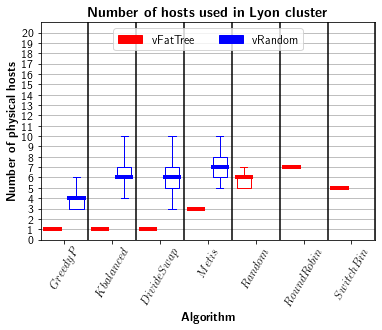

In [8]:
fattree_keys = [list(filter(lambda x:x in fattree_instances_with_solution_for_all,solved)) for solved in fattree]
random_keys = [list(filter(lambda x:x in random_instances_with_solution_for_all,solved)) for solved in random]
fattree_values = [[fattree_cleaned_data[x].EMBEDGREEDY_HOSTS for x in fattree_keys[0]],
                  [fattree_cleaned_data[x].EMBEDBALANCED_HOSTS for x in fattree_keys[1]],
                  [fattree_cleaned_data[x].EMBEDPARTITION_HOSTS for x in fattree_keys[2]],
                  [fattree_cleaned_data[x].METIS_HOSTS for x in fattree_keys[3]],
                  [fattree_cleaned_data[x].RANDOM_HOSTS for x in fattree_keys[4]],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOSTS for x in fattree_keys[5]],
                  [fattree_cleaned_data[x].SWITCHBIN_HOSTS for x in fattree_keys[6]]]

random_values = [[random_cleaned_data[x].EMBEDGREEDY_HOSTS for x in random_keys[0]],
                  [random_cleaned_data[x].EMBEDBALANCED_HOSTS for x in random_keys[1]],
                  [random_cleaned_data[x].EMBEDPARTITION_HOSTS for x in random_keys[2]],
                  [random_cleaned_data[x].METIS_HOSTS for x in random_keys[3]],
                  [random_cleaned_data[x].RANDOM_HOSTS for x in random_keys[4]],
                  [random_cleaned_data[x].ROUNDROBIN_HOSTS for x in random_keys[5]],
                  [random_cleaned_data[x].SWITCHBIN_HOSTS for x in random_keys[6]]]

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

#PARTITION = DivideSwap
#GREEDY = GreedyP
#BALANCED = K-balanced
color_b1="red"
color_b2="blue"



ticks = ["GreedyP","Kbalanced","DivideSwap","Metis","Random","RoundRobin","SwitchBin"]

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
b1 = plt.boxplot(fattree_values, positions=np.array(range(len(fattree_values)))*2.0-0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b1),
            capprops=dict(color=color_b1),
            whiskerprops=dict(color=color_b1),
            flierprops=dict(color=color_b1, markeredgecolor=color_b1),
            medianprops=dict(color=color_b1,linewidth=4))
b2 = plt.boxplot(random_values, positions=np.array(range(len(random_values)))*2.0+0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b2),
            capprops=dict(color=color_b2),
            whiskerprops=dict(color=color_b2),
            flierprops=dict(color=color_b2, markeredgecolor=color_b2),
            medianprops=dict(color=color_b2,linewidth=4))



# draw temporary red and blue lines and use them to create a legend
ax.tick_params(axis='x', rotation=60)
plt.xticks(range(0, len(ticks) * 2 + 2, 2), ticks)
plt.tick_params(axis='both', labelsize=12)

plt.yticks(range(0, 21), range(0, 21))

plt.ylabel(r'\textbf{Number of physical hosts}', fontsize=12)
plt.xlabel(r'\textbf{Algorithm}', fontsize=12)

plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

for i in range(0,len(ticks)*2,2):
    plt.axvline(x=i+1,color="black")
    
plt.tick_params(axis='x', rotation=60)
plt.grid(axis='y')
plt.xlim(-1, 13)
plt.ylim(0, 21)

lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="vFatTree")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="vRandom")
lables_patchs.append(add_patch)
lables = ["vFatTree","vRandom"]

plt.legend(lables_patchs,lables, fontsize=12, ncol=2, loc="upper center")
plt.title(r'\textbf{Number of hosts used in Lyon cluster}', fontsize=14)


plt.savefig('Lyon_solutions_all_algo.pdf',bbox_inches='tight')
#plt.show()
#plt.yscale("log")


<Figure size 960x480 with 0 Axes>

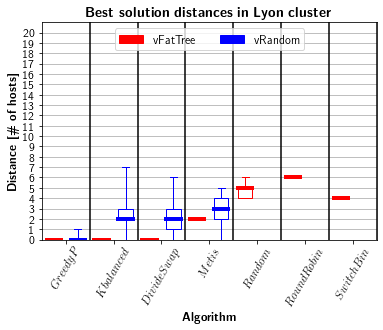

In [9]:
fattree_keys = [list(filter(lambda x:x in fattree_instances_with_solution_for_all,solved)) for solved in fattree]
random_keys = [list(filter(lambda x:x in random_instances_with_solution_for_all,solved)) for solved in random]
fattree_values = [[fattree_cleaned_data[x].EMBEDGREEDY_HOSTS for x in sorted(fattree_keys[0])],
                  [fattree_cleaned_data[x].EMBEDBALANCED_HOSTS for x in sorted(fattree_keys[1])],
                  [fattree_cleaned_data[x].EMBEDPARTITION_HOSTS for x in sorted(fattree_keys[2])],
                  [fattree_cleaned_data[x].METIS_HOSTS for x in sorted(fattree_keys[3])],
                  [fattree_cleaned_data[x].RANDOM_HOSTS for x in sorted(fattree_keys[4])],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOSTS for x in sorted(fattree_keys[5])],
                  [fattree_cleaned_data[x].SWITCHBIN_HOSTS for x in sorted(fattree_keys[6])]]

for i in range(0,len(fattree_values[0])):
    minimum_solution = min([fattree_values[j][i] for j in range(0,len(fattree_values))])
    for j in range(0,len(fattree_values)):
        fattree_values[j][i] -= minimum_solution



random_values = [[random_cleaned_data[x].EMBEDGREEDY_HOSTS for x in random_keys[0]],
                  [random_cleaned_data[x].EMBEDBALANCED_HOSTS for x in random_keys[1]],
                  [random_cleaned_data[x].EMBEDPARTITION_HOSTS for x in random_keys[2]],
                  [random_cleaned_data[x].METIS_HOSTS for x in random_keys[3]],
                  [random_cleaned_data[x].RANDOM_HOSTS for x in random_keys[4]],
                  [random_cleaned_data[x].ROUNDROBIN_HOSTS for x in random_keys[5]],
                  [random_cleaned_data[x].SWITCHBIN_HOSTS for x in random_keys[6]]]



for i in range(0,len(random_values[0])):
    minimum_solution = min([random_values[j][i] for j in range(0,len(random_values)-3)]) # -3 removes the solution that do not exists
    for j in range(0,len(random_values)-3): # -3 removes the solution that do not exists
        random_values[j][i] -= minimum_solution


import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

#PARTITION = DivideSwap
#GREEDY = GreedyP
#BALANCED = K-balanced
color_b1="red"
color_b2="blue"



ticks = ["GreedyP","Kbalanced","DivideSwap","Metis","Random","RoundRobin","SwitchBin"]

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
b1 = plt.boxplot(fattree_values, positions=np.array(range(len(fattree_values)))*2.0-0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b1),
            capprops=dict(color=color_b1),
            whiskerprops=dict(color=color_b1),
            flierprops=dict(color=color_b1, markeredgecolor=color_b1),
            medianprops=dict(color=color_b1,linewidth=4))
b2 = plt.boxplot(random_values, positions=np.array(range(len(random_values)))*2.0+0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b2),
            capprops=dict(color=color_b2),
            whiskerprops=dict(color=color_b2),
            flierprops=dict(color=color_b2, markeredgecolor=color_b2),
            medianprops=dict(color=color_b2,linewidth=4))



# draw temporary red and blue lines and use them to create a legend
ax.tick_params(axis='x', rotation=60)
plt.xticks(range(0, len(ticks) * 2 + 2, 2), ticks)
plt.tick_params(axis='both', labelsize=12)

plt.yticks(range(0, 21), range(0, 21))

plt.ylabel(r'\textbf{Distance [\# of hosts]}', fontsize=12)
plt.xlabel(r'\textbf{Algorithm}', fontsize=12)

plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

for i in range(0,len(ticks)*2,2):
    plt.axvline(x=i+1,color="black")
    
plt.tick_params(axis='x', rotation=60)
plt.grid(axis='y')
plt.xlim(-1, 13)
plt.ylim(0, 21)

lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="vFatTree")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="vRandom")
lables_patchs.append(add_patch)
lables = ["vFatTree","vRandom"]

plt.legend(lables_patchs,lables, fontsize=12, ncol=2, loc="upper center")
plt.title(r'\textbf{Best solution distances in Lyon cluster}', fontsize=14)
#plt.show()
#plt.yscale("log")
plt.savefig('Lyon_distances_all_algo.pdf',bbox_inches='tight')



[67.22689075630252, 96.03174603174604, 94.44444444444444, 88.18860877684406]


<Figure size 960x480 with 0 Axes>

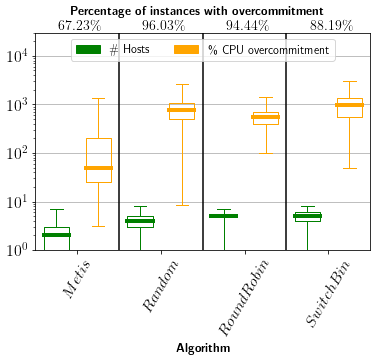

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged]]


n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]



def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()




b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% CPU overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% CPU overcommitment"]

#plt.title(r'\textbf{CPU overcommitment Lyon cluster}', font=14)
plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=12, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)





plt.savefig('Lyon_CPU_overcommitment.pdf',bbox_inches='tight')
#plt.show()

[63.305322128851536, 92.43697478991596, 90.70961718020541, 86.36788048552755]


<Figure size 960x480 with 0 Axes>

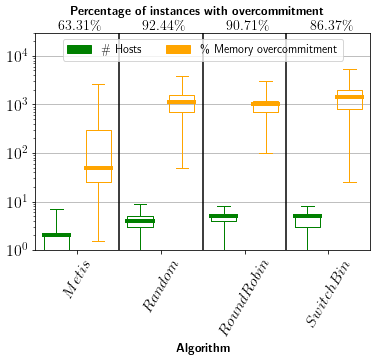

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Memory overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% Memory overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=12, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)


plt.savefig('Lyon_Memory_overcommitment.pdf',bbox_inches='tight')
#plt.show()

[1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 4.0]
[2.3342670401493932, 42.997198879551824, 32.72642390289449, 21.521942110177406]


<Figure size 960x480 with 0 Axes>

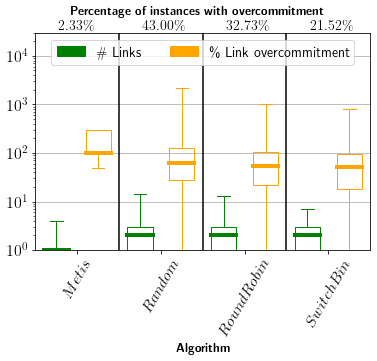

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]
print(n_cpu[0])




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Links")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Memory overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Links","\% Link overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Lyon_Link_overcommitment.pdf',bbox_inches='tight')
#plt.show()


In [13]:
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np
import csv
from copy import deepcopy

algorithms= ["Metis", "EmbedBalanced", "EmbedPartition",
             "EmbedGreedy", "RandomPlacer","RoundRobin",
             "SwitchBinPlacer"]

labels = ['K', 'CORES','MEMORY','RATE','DENSITY',
                   "EMBEDGREEDY_HOSTS", "EMBEDBALANCED_HOSTS", "EMBEDPARTITION_HOSTS", "METIS_HOSTS",
                  "METIS_HOST_CPU_OVERCOMMITMENT", "METIS_HOST_MEMORY_OVERCOMMITMENT", "METIS_HOST_LINK_OVERCOMMITMENT","METIS_MAX_CPU_OVERCOMMITMENT", "METIS_MAX_MEMORY_OVERCOMMITMENT", "METIS_MAX_LINK_OVERCOMMITMENT",
                  "RANDOM_HOSTS","RANDOM_HOST_CPU_OVERCOMMITMENT", "RANDOM_HOST_MEMORY_OVERCOMMITMENT", "RANDOM_HOST_LINK_OVERCOMMITMENT","RANDOM_MAX_CPU_OVERCOMMITMENT", "RANDOM_MAX_MEMORY_OVERCOMMITMENT", "RANDOM_MAX_LINK_OVERCOMMITMENT",
                  "ROUNDROBIN_HOSTS","ROUNDROBIN_HOST_CPU_OVERCOMMITMENT", "ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_HOST_LINK_OVERCOMMITMENT","ROUNDROBIN_MAX_CPU_OVERCOMMITMENT", "ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_MAX_LINK_OVERCOMMITMENT",
                  "SWITCHBIN_HOSTS", "SWITCHBIN_HOST_CPU_OVERCOMMITMENT", "SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT", "SWITCHBIN_HOST_LINK_OVERCOMMITMENT","SWITCHBIN_MAX_CPU_OVERCOMMITMENT", "SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT", "SWITCHBIN_MAX_LINK_OVERCOMMITMENT"]




experiment_key = namedtuple("experiment_key", labels[:5])
experiment_results= namedtuple("experiment_results", labels[5:])
e=experiment_key(2,2,4,2,2)
clened_data={}
with open('pkl/Gros_fattree.csv') as File:
    reader = csv.reader(File, delimiter=';', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    
    for row in list(reader)[1:]:
        #print(row)
        key_= experiment_key(*[int(float(i.replace(",","."))) for i in row[:5]])
        #print(key_)
        results_ = experiment_results(*[float(i.replace(",",".")) if float(i.replace(",",".")) >= 0 else -1 for i in row[5:]])
        #print(results_)
        clened_data[key_]=results_

filtered_data=dict()
for key in clened_data.keys():
    if clened_data[key].EMBEDGREEDY_HOSTS>0:
        filtered_data[key]=clened_data[key]
print(len(clened_data.keys()))

print(len(filtered_data.keys()))
fattree_cleaned_data=clened_data

1260
761


In [14]:
#print(clened_data.values())
print("Embedded Greedy solved")
fattree_eg_solved=list(filter(lambda x:clened_data[x].EMBEDGREEDY_HOSTS>0, clened_data.keys()))
print(len(fattree_eg_solved))
print("-------------------------")

print("Embedded Balanced solved")
fattree_eb_solved=list(filter(lambda x:clened_data[x].EMBEDBALANCED_HOSTS>0, clened_data.keys()))
print(len(fattree_eb_solved))
print("-------------------------")

print("Embedded Partition solved")
fattree_ep_solved=list(filter(lambda x:clened_data[x].EMBEDPARTITION_HOSTS>0, clened_data.keys()))
print(len(fattree_ep_solved))
print("-------------------------")

print("Metis solved without overcommitment")
fattree_metis_solved=list(filter(lambda x:clened_data[x].METIS_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_metis_solved))
print("-------------------------")

print("Random solved without overcommitment")
fattree_random_solved=list(filter(lambda x:clened_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_random_solved))
print("-------------------------")

print("RoundRobin solved without overcommitment")
fattree_roundrobin_solved = list(filter(lambda x:clened_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_roundrobin_solved))
print("-------------------------")

print("SwitchBin solved without overcommitment")
fattree_switchBin_solved = list(filter(lambda x:clened_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_switchBin_solved))
print("-------------------------")

print("All solution Marged")
fattree_all_solution_marged=set(fattree_eg_solved+fattree_eb_solved+fattree_ep_solved+fattree_metis_solved+fattree_random_solved+fattree_roundrobin_solved+fattree_switchBin_solved)
print(len(fattree_all_solution_marged))
print("-------------------------")

print("All solution with solution for all the algos")
fattree_instances_with_solution_for_all= fattree_all_solution_marged.intersection(set(fattree_eg_solved),set(fattree_eb_solved),set(fattree_ep_solved),set(fattree_metis_solved),set(fattree_random_solved),set(fattree_roundrobin_solved),set(fattree_switchBin_solved))
print(len(fattree_instances_with_solution_for_all))
print("-------------------------")

print("Embedded Greedy solved %")
print(len(fattree_eg_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Balanced solved %")
print(len(fattree_eb_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Partition solved %")
print(len(fattree_ep_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Metis solved %")
print(len(fattree_metis_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Random solved %")
print(len(fattree_random_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("RoundRobin solved %")
print(len(fattree_roundrobin_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("SwitchBin solved %")
print(len(fattree_switchBin_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("All algo solved %")
print(len(fattree_instances_with_solution_for_all)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")


Embedded Greedy solved
761
-------------------------
Embedded Balanced solved
698
-------------------------
Embedded Partition solved
744
-------------------------
Metis solved without overcommitment
647
-------------------------
Random solved without overcommitment
548
-------------------------
RoundRobin solved without overcommitment
752
-------------------------
SwitchBin solved without overcommitment
633
-------------------------
All solution Marged
761
-------------------------
All solution with solution for all the algos
522
-------------------------
Embedded Greedy solved %
100.0 %
-------------------------
Embedded Balanced solved %
91.72141918528253 %
-------------------------
Embedded Partition solved %
97.76609724047306 %
-------------------------
Metis solved %
85.0197109067017 %
-------------------------
Random solved %
72.01051248357425 %
-------------------------
RoundRobin solved %
98.8173455978975 %
-------------------------
SwitchBin solved %
83.18002628120894 %
-----

In [15]:
def get_data_ft(dataset,K=None,DENSITY=None,CORES=None,MEMORY=None,RATE=None):
    keys=list(dataset.keys())
    
    if K != None:
        keys=list(filter(lambda x: x.K == K, keys))
        
    if DENSITY != None:
        keys=list(filter(lambda x: x.DENSITY == DENSITY, keys))
        
    if CORES != None:
        keys=list(filter(lambda x: x.CORES == CORES, keys))
        
    if MEMORY != None:
        keys=list(filter(lambda x: x.MEMORY == MEMORY, keys))
        
    if RATE != None:
        keys=list(filter(lambda x: x.RATE == RATE, keys))
    
    data_retrived={}
    for k in keys:
        data_retrived[k]=dataset[k]
        
    return data_retrived

In [16]:
def get_data_rd(dataset,K=None,DENSITY=None,CORES=None,MEMORY=None,RATE=None):
    keys=list(dataset.keys())
    
    if K != None:
        keys=list(filter(lambda x: x.N == N, keys))
        
    if DENSITY != None:
        keys=list(filter(lambda x: x.DENSITY == DENSITY, keys))
        
    if SEED != None:
        keys=list(filter(lambda x: x.SEED == SEED, keys))
    
    data_retrived={}
    for k in keys:
        data_retrived[k]=dataset[k]
        
    return data_retrived

In [17]:
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np
import csv
from copy import deepcopy

algorithms= ["Metis", "EmbedBalanced", "EmbedPartition",
             "EmbedGreedy", "RandomPlacer","RoundRobin",
             "SwitchBinPlacer"]

labels = ['N', 'DENSITY', 'SEED',
                   "EMBEDGREEDY_HOSTS", "EMBEDBALANCED_HOSTS", "EMBEDPARTITION_HOSTS", "METIS_HOSTS",
                  "METIS_HOST_CPU_OVERCOMMITMENT", "METIS_HOST_MEMORY_OVERCOMMITMENT", "METIS_HOST_LINK_OVERCOMMITMENT","METIS_MAX_CPU_OVERCOMMITMENT", "METIS_MAX_MEMORY_OVERCOMMITMENT", "METIS_MAX_LINK_OVERCOMMITMENT",
                  "RANDOM_HOSTS","RANDOM_HOST_CPU_OVERCOMMITMENT", "RANDOM_HOST_MEMORY_OVERCOMMITMENT", "RANDOM_HOST_LINK_OVERCOMMITMENT","RANDOM_MAX_CPU_OVERCOMMITMENT", "RANDOM_MAX_MEMORY_OVERCOMMITMENT", "RANDOM_MAX_LINK_OVERCOMMITMENT",
                  "ROUNDROBIN_HOSTS","ROUNDROBIN_HOST_CPU_OVERCOMMITMENT", "ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_HOST_LINK_OVERCOMMITMENT","ROUNDROBIN_MAX_CPU_OVERCOMMITMENT", "ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_MAX_LINK_OVERCOMMITMENT",
                  "SWITCHBIN_HOSTS", "SWITCHBIN_HOST_CPU_OVERCOMMITMENT", "SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT", "SWITCHBIN_HOST_LINK_OVERCOMMITMENT","SWITCHBIN_MAX_CPU_OVERCOMMITMENT", "SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT", "SWITCHBIN_MAX_LINK_OVERCOMMITMENT"]




experiment_key = namedtuple("experiment_key", labels[:3])
experiment_results= namedtuple("experiment_results", labels[3:])
e=experiment_key(2,0.1,4)
clened_data={}
with open('pkl/Gros_random.csv') as File:
    reader = csv.reader(File, delimiter=';', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    
    for row in list(reader)[1:]:
        #print(row)
        key_= experiment_key(*[float(i.replace(",",".")) for i in row[:3]])
        #print(key_)
        results_ = experiment_results(*[float(i.replace(",",".")) if float(i.replace(",",".")) >= 0 else -1 for i in row[3:]])
        #print(results_)
        clened_data[key_]=results_

filtered_data=dict()
for key in clened_data.keys():
    if clened_data[key].EMBEDGREEDY_HOSTS>0:
        filtered_data[key]=clened_data[key]
print(len(clened_data.keys()))

print(len(filtered_data.keys()))

random_cleaned_data=clened_data

4500
4500


In [18]:
print("Embedded Greedy solved")
random_eg_solved=list(filter(lambda x:clened_data[x].EMBEDGREEDY_HOSTS>0, clened_data.keys()))
print(len(random_eg_solved))
print("-------------------------")

print("Embedded Balanced solved")
random_eb_solved=list(filter(lambda x:clened_data[x].EMBEDBALANCED_HOSTS>0, clened_data.keys()))
print(len(random_eb_solved))
print("-------------------------")

print("Embedded Partition solved")
random_ep_solved=list(filter(lambda x:clened_data[x].EMBEDPARTITION_HOSTS>0, clened_data.keys()))
print(len(random_ep_solved))
print("-------------------------")

print("Metis solved without overcommitment")
random_metis_solved=list(filter(lambda x:clened_data[x].METIS_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_metis_solved))
print("-------------------------")

print("Random solved without overcommitment")
random_random_solved=list(filter(lambda x:clened_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_random_solved))
print("-------------------------")

print("RoundRobin solved without overcommitment")
random_roundrobin_solved = list(filter(lambda x:clened_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_roundrobin_solved))
print("-------------------------")

print("SwitchBin solved without overcommitment")
random_switchBin_solved = list(filter(lambda x:clened_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_switchBin_solved))
print("-------------------------")

print("All solution Marged")
random_all_solution_marged=set(random_eg_solved+random_eb_solved+random_ep_solved+random_metis_solved+random_random_solved+random_roundrobin_solved+random_switchBin_solved)
print(len(random_all_solution_marged))
print("-------------------------")

print("All solution with solution for all the algos")
random_instances_with_solution_for_all= random_all_solution_marged.intersection(set(random_eg_solved),set(random_eb_solved),set(random_ep_solved),set(random_metis_solved),set(random_random_solved),set(random_roundrobin_solved),set(random_switchBin_solved))
print(len(random_instances_with_solution_for_all))
print("-------------------------")


print("Embedded Greedy solved %")
print(len(random_eg_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Balanced solved %")
print(len(random_eb_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Partition solved %")
print(len(random_ep_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Metis solved %")
print(len(random_metis_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Random solved %")
print(len(random_random_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("RoundRobin solved %")
print(len(random_roundrobin_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("SwitchBin solved %")
print(len(random_switchBin_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("All algo solved %")
print(len(random_instances_with_solution_for_all)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

Embedded Greedy solved
4500
-------------------------
Embedded Balanced solved
3749
-------------------------
Embedded Partition solved
4349
-------------------------
Metis solved without overcommitment
2624
-------------------------
Random solved without overcommitment
2369
-------------------------
RoundRobin solved without overcommitment
4192
-------------------------
SwitchBin solved without overcommitment
1704
-------------------------
All solution Marged
4500
-------------------------
All solution with solution for all the algos
1444
-------------------------
Embedded Greedy solved %
100.0 %
-------------------------
Embedded Balanced solved %
83.31111111111112 %
-------------------------
Embedded Partition solved %
96.64444444444445 %
-------------------------
Metis solved %
58.31111111111112 %
-------------------------
Random solved %
52.644444444444446 %
-------------------------
RoundRobin solved %
93.15555555555555 %
-------------------------
SwitchBin solved %
37.8666666666

<Figure size 960x480 with 0 Axes>

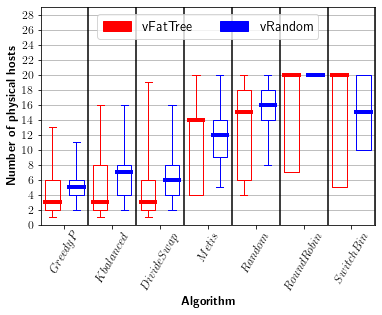

In [19]:
fattree = [fattree_eg_solved,fattree_eb_solved,fattree_ep_solved,fattree_metis_solved,fattree_random_solved,fattree_roundrobin_solved,fattree_switchBin_solved]
random = [random_eg_solved,random_eb_solved,random_ep_solved,random_metis_solved,random_random_solved,random_roundrobin_solved,random_switchBin_solved]

fattree_keys = [list(filter(lambda x:x in fattree_instances_with_solution_for_all,solved)) for solved in fattree]
random_keys = [list(filter(lambda x:x in random_instances_with_solution_for_all,solved)) for solved in random]
fattree_values = [[fattree_cleaned_data[x].EMBEDGREEDY_HOSTS for x in fattree_keys[0]],
                  [fattree_cleaned_data[x].EMBEDBALANCED_HOSTS for x in fattree_keys[1]],
                  [fattree_cleaned_data[x].EMBEDPARTITION_HOSTS for x in fattree_keys[2]],
                  [fattree_cleaned_data[x].METIS_HOSTS for x in fattree_keys[3]],
                  [fattree_cleaned_data[x].RANDOM_HOSTS for x in fattree_keys[4]],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOSTS for x in fattree_keys[5]],
                  [fattree_cleaned_data[x].SWITCHBIN_HOSTS for x in fattree_keys[6]]]

random_values = [[random_cleaned_data[x].EMBEDGREEDY_HOSTS for x in random_keys[0]],
                  [random_cleaned_data[x].EMBEDBALANCED_HOSTS for x in random_keys[1]],
                  [random_cleaned_data[x].EMBEDPARTITION_HOSTS for x in random_keys[2]],
                  [random_cleaned_data[x].METIS_HOSTS for x in random_keys[3]],
                  [random_cleaned_data[x].RANDOM_HOSTS for x in random_keys[4]],
                  [random_cleaned_data[x].ROUNDROBIN_HOSTS for x in random_keys[5]],
                  [random_cleaned_data[x].SWITCHBIN_HOSTS for x in random_keys[6]]]

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

#PARTITION = DivideSwap
#GREEDY = GreedyP
#BALANCED = K-balanced

ticks = ["GreedyP","Kbalanced","DivideSwap","Metis","Random","RoundRobin","SwitchBin"]

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
color_b1="red"
color_b2="blue"


fig, ax = plt.subplots()
b1 = plt.boxplot(fattree_values, positions=np.array(range(len(fattree_values)))*2.0-0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b1),
            capprops=dict(color=color_b1),
            whiskerprops=dict(color=color_b1),
            flierprops=dict(color=color_b1, markeredgecolor=color_b1),
            medianprops=dict(color=color_b1,linewidth=4))
b2 = plt.boxplot(random_values, positions=np.array(range(len(random_values)))*2.0+0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b2),
            capprops=dict(color=color_b2),
            whiskerprops=dict(color=color_b2),
            flierprops=dict(color=color_b2, markeredgecolor=color_b2),
            medianprops=dict(color=color_b2,linewidth=4))


# draw temporary red and blue lines and use them to create a legend
ax.tick_params(axis='x', rotation=60)
plt.xticks(range(0, len(ticks) * 2 + 2, 2), ticks)
plt.tick_params(axis='both', labelsize=12)

plt.yticks(range(0, 21), range(0, 21))

plt.ylabel(r'\textbf{Number of physical hosts}', fontsize=12)
plt.xlabel(r'\textbf{Algorithm}', fontsize=12)

plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

for i in range(0,len(ticks)*2,2):
    plt.axvline(x=i+1,color="black")
    
plt.tick_params(axis='x', rotation=60)
plt.grid(axis='y')
plt.xlim(-1, 13)
plt.ylim(0, 29)
plt.yticks(list(range(0,30,2)), [f'${i}$' for i in range(0,30,2)])


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="vFatTree")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="vRandom")
lables_patchs.append(add_patch)
lables = ["vFatTree","vRandom"]

plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")

plt.savefig('Gros_solutions_all_algo.pdf',bbox_inches='tight')
#plt.show()
#plt.yscale("log")

<Figure size 960x480 with 0 Axes>

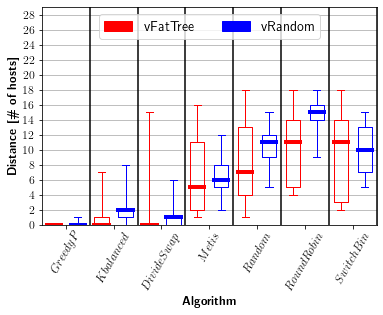

In [20]:

fattree_keys = [list(filter(lambda x:x in fattree_instances_with_solution_for_all,solved)) for solved in fattree]
random_keys = [list(filter(lambda x:x in random_instances_with_solution_for_all,solved)) for solved in random]
fattree_values = [[fattree_cleaned_data[x].EMBEDGREEDY_HOSTS for x in sorted(fattree_keys[0])],
                  [fattree_cleaned_data[x].EMBEDBALANCED_HOSTS for x in sorted(fattree_keys[1])],
                  [fattree_cleaned_data[x].EMBEDPARTITION_HOSTS for x in sorted(fattree_keys[2])],
                  [fattree_cleaned_data[x].METIS_HOSTS for x in sorted(fattree_keys[3])],
                  [fattree_cleaned_data[x].RANDOM_HOSTS for x in sorted(fattree_keys[4])],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOSTS for x in sorted(fattree_keys[5])],
                  [fattree_cleaned_data[x].SWITCHBIN_HOSTS for x in sorted(fattree_keys[6])]]

for i in range(0,len(fattree_values[0])):
    minimum_solution = min([fattree_values[j][i] for j in range(0,len(fattree_values))])
    for j in range(0,len(fattree_values)):
        fattree_values[j][i] -= minimum_solution



random_values = [[random_cleaned_data[x].EMBEDGREEDY_HOSTS for x in random_keys[0]],
                  [random_cleaned_data[x].EMBEDBALANCED_HOSTS for x in random_keys[1]],
                  [random_cleaned_data[x].EMBEDPARTITION_HOSTS for x in random_keys[2]],
                  [random_cleaned_data[x].METIS_HOSTS for x in random_keys[3]],
                  [random_cleaned_data[x].RANDOM_HOSTS for x in random_keys[4]],
                  [random_cleaned_data[x].ROUNDROBIN_HOSTS for x in random_keys[5]],
                  [random_cleaned_data[x].SWITCHBIN_HOSTS for x in random_keys[6]]]



for i in range(0,len(random_values[0])):
    minimum_solution = min([random_values[j][i] for j in range(0,len(random_values))])
    for j in range(0,len(random_values)): 
        random_values[j][i] -= minimum_solution


import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

#PARTITION = DivideSwap
#GREEDY = GreedyP
#BALANCED = K-balanced
color_b1="red"
color_b2="blue"



ticks = ["GreedyP","Kbalanced","DivideSwap","Metis","Random","RoundRobin","SwitchBin"]

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
b1 = plt.boxplot(fattree_values, positions=np.array(range(len(fattree_values)))*2.0-0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b1),
            capprops=dict(color=color_b1),
            whiskerprops=dict(color=color_b1),
            flierprops=dict(color=color_b1, markeredgecolor=color_b1),
            medianprops=dict(color=color_b1,linewidth=4))
b2 = plt.boxplot(random_values, positions=np.array(range(len(random_values)))*2.0+0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b2),
            capprops=dict(color=color_b2),
            whiskerprops=dict(color=color_b2),
            flierprops=dict(color=color_b2, markeredgecolor=color_b2),
            medianprops=dict(color=color_b2,linewidth=4))



# draw temporary red and blue lines and use them to create a legend
ax.tick_params(axis='x', rotation=60)
plt.xticks(range(0, len(ticks) * 2 + 2, 2), ticks)
plt.tick_params(axis='both', labelsize=12)

plt.yticks(range(0, 21), range(0, 21))

plt.ylabel(r'\textbf{Distance [\# of hosts]}', fontsize=12)
plt.xlabel(r'\textbf{Algorithm}', fontsize=12)

plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

for i in range(0,len(ticks)*2,2):
    plt.axvline(x=i+1,color="black")
    
plt.tick_params(axis='x', rotation=60)
plt.grid(axis='y')
plt.xlim(-1, 13)
plt.ylim(0, 29)
plt.yticks(list(range(0,30,2)), [f'${i}$' for i in range(0,30,2)])

lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="vFatTree")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="vRandom")
lables_patchs.append(add_patch)
lables = ["vFatTree","vRandom"]

plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")

plt.savefig('Gros_distances_all_algo.pdf',bbox_inches='tight')
#plt.show()
#plt.yscale("log")



[37.25527466261167, 43.527846417030986, 5.854400304124692, 54.989545713742636]


<Figure size 960x480 with 0 Axes>

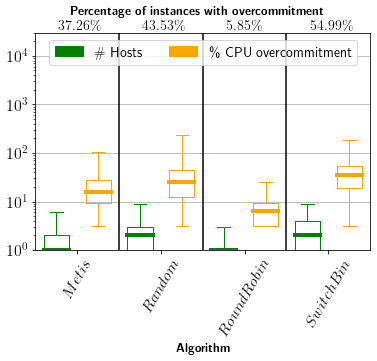

In [21]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% CPU overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% CPU overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Gros_CPU_overcommitment.pdf',bbox_inches='tight')
#plt.show()

[0.5702337958563011, 1.4826078692263827, 0.0, 2.547044288158145]


<Figure size 960x480 with 0 Axes>

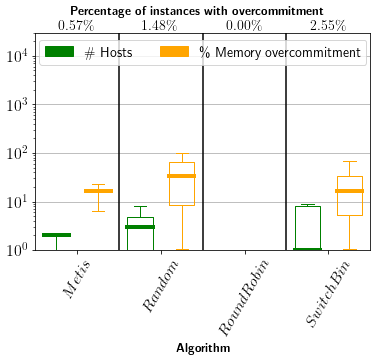

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Memory overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% Memory overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Gros_Memory_overcommitment.pdf',bbox_inches='tight')


#plt.show()

[4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 4.0, 5.0]
[0.1710701387568903, 0.8173351073940316, 0.1710701387568903, 0.1710701387568903]


<Figure size 960x480 with 0 Axes>

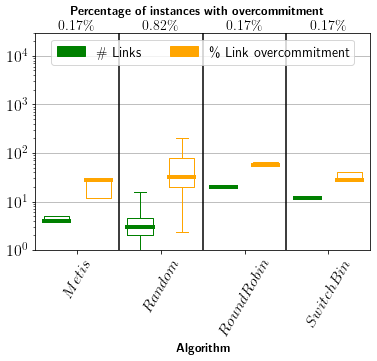

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]
print(n_cpu[0])




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Link")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Link overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Links","\% Link overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Gros_Link_overcommitment.pdf',bbox_inches='tight')


#plt.show()

In [24]:
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np
import csv
from copy import deepcopy

algorithms= ["Metis", "EmbedBalanced", "EmbedPartition",
             "EmbedGreedy", "RandomPlacer","RoundRobin",
             "SwitchBinPlacer"]

labels = ['K', 'CORES','MEMORY','RATE','DENSITY',
                   "EMBEDGREEDY_HOSTS", "EMBEDBALANCED_HOSTS", "EMBEDPARTITION_HOSTS", "METIS_HOSTS",
                  "METIS_HOST_CPU_OVERCOMMITMENT", "METIS_HOST_MEMORY_OVERCOMMITMENT", "METIS_HOST_LINK_OVERCOMMITMENT","METIS_MAX_CPU_OVERCOMMITMENT", "METIS_MAX_MEMORY_OVERCOMMITMENT", "METIS_MAX_LINK_OVERCOMMITMENT",
                  "RANDOM_HOSTS","RANDOM_HOST_CPU_OVERCOMMITMENT", "RANDOM_HOST_MEMORY_OVERCOMMITMENT", "RANDOM_HOST_LINK_OVERCOMMITMENT","RANDOM_MAX_CPU_OVERCOMMITMENT", "RANDOM_MAX_MEMORY_OVERCOMMITMENT", "RANDOM_MAX_LINK_OVERCOMMITMENT",
                  "ROUNDROBIN_HOSTS","ROUNDROBIN_HOST_CPU_OVERCOMMITMENT", "ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_HOST_LINK_OVERCOMMITMENT","ROUNDROBIN_MAX_CPU_OVERCOMMITMENT", "ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_MAX_LINK_OVERCOMMITMENT",
                  "SWITCHBIN_HOSTS", "SWITCHBIN_HOST_CPU_OVERCOMMITMENT", "SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT", "SWITCHBIN_HOST_LINK_OVERCOMMITMENT","SWITCHBIN_MAX_CPU_OVERCOMMITMENT", "SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT", "SWITCHBIN_MAX_LINK_OVERCOMMITMENT"]




experiment_key = namedtuple("experiment_key", labels[:5])
experiment_results= namedtuple("experiment_results", labels[5:])
e=experiment_key(2,2,4,2,2)
clened_data={}
with open('pkl/Rennes_fattree.csv') as File:
    reader = csv.reader(File, delimiter=';', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    
    for row in list(reader)[1:]:
        #print(row)
        key_= experiment_key(*[int(float(i.replace(",","."))) for i in row[:5]])
        #print(key_)
        results_ = experiment_results(*[float(i.replace(",",".")) if float(i.replace(",",".")) >= 0 else -1 for i in row[5:]])
        #print(results_)
        clened_data[key_]=results_

filtered_data=dict()
for key in clened_data.keys():
    if clened_data[key].EMBEDGREEDY_HOSTS>0:
        filtered_data[key]=clened_data[key]
print(len(clened_data.keys()))

print(len(filtered_data.keys()))
fattree_cleaned_data=clened_data

1260
708


In [25]:
print("Embedded Greedy solved")
fattree_eg_solved=list(filter(lambda x:clened_data[x].EMBEDGREEDY_HOSTS>0, clened_data.keys()))
print(len(fattree_eg_solved))
print("-------------------------")

print("Embedded Balanced solved")
fattree_eb_solved=list(filter(lambda x:clened_data[x].EMBEDBALANCED_HOSTS>0, clened_data.keys()))
print(len(fattree_eb_solved))
print("-------------------------")

print("Embedded Partition solved")
fattree_ep_solved=list(filter(lambda x:clened_data[x].EMBEDPARTITION_HOSTS>0, clened_data.keys()))
print(len(fattree_ep_solved))
print("-------------------------")

print("Metis solved without overcommitment")
fattree_metis_solved=list(filter(lambda x:clened_data[x].METIS_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_metis_solved))
print("-------------------------")

print("Random solved without overcommitment")
fattree_random_solved=list(filter(lambda x:clened_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_random_solved))
print("-------------------------")

print("RoundRobin solved without overcommitment")
fattree_roundrobin_solved = list(filter(lambda x:clened_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_roundrobin_solved))
print("-------------------------")

print("SwitchBin solved without overcommitment")
fattree_switchBin_solved = list(filter(lambda x:clened_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_switchBin_solved))
print("-------------------------")

print("All solution Marged")
fattree_all_solution_marged=set(fattree_eg_solved+fattree_eb_solved+fattree_ep_solved+fattree_metis_solved+fattree_random_solved+fattree_roundrobin_solved+fattree_switchBin_solved)
print(len(fattree_all_solution_marged))
print("-------------------------")

print("All solution with solution for all the algos")
fattree_instances_with_solution_for_all= fattree_all_solution_marged.intersection(set(fattree_eg_solved),set(fattree_eb_solved),set(fattree_ep_solved),set(fattree_metis_solved),set(fattree_random_solved),set(fattree_roundrobin_solved),set(fattree_switchBin_solved))
print(len(fattree_instances_with_solution_for_all))
print("-------------------------")

print("Embedded Greedy solved %")
print(len(fattree_eg_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Balanced solved %")
print(len(fattree_eb_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Partition solved %")
print(len(fattree_ep_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Metis solved %")
print(len(fattree_metis_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Random solved %")
print(len(fattree_random_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("RoundRobin solved %")
print(len(fattree_roundrobin_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("SwitchBin solved %")
print(len(fattree_switchBin_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("All algo solved %")
print(len(fattree_instances_with_solution_for_all)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

Embedded Greedy solved
708
-------------------------
Embedded Balanced solved
594
-------------------------
Embedded Partition solved
652
-------------------------
Metis solved without overcommitment
466
-------------------------
Random solved without overcommitment
306
-------------------------
RoundRobin solved without overcommitment
484
-------------------------
SwitchBin solved without overcommitment
315
-------------------------
All solution Marged
708
-------------------------
All solution with solution for all the algos
242
-------------------------
Embedded Greedy solved %
100.0 %
-------------------------
Embedded Balanced solved %
83.89830508474576 %
-------------------------
Embedded Partition solved %
92.09039548022598 %
-------------------------
Metis solved %
65.81920903954803 %
-------------------------
Random solved %
43.22033898305085 %
-------------------------
RoundRobin solved %
68.36158192090396 %
-------------------------
SwitchBin solved %
44.49152542372881 %
---

In [26]:
def get_data_ft(dataset,K=None,DENSITY=None,CORES=None,MEMORY=None,RATE=None):
    keys=list(dataset.keys())
    
    if K != None:
        keys=list(filter(lambda x: x.K == K, keys))
        
    if DENSITY != None:
        keys=list(filter(lambda x: x.DENSITY == DENSITY, keys))
        
    if CORES != None:
        keys=list(filter(lambda x: x.CORES == CORES, keys))
        
    if MEMORY != None:
        keys=list(filter(lambda x: x.MEMORY == MEMORY, keys))
        
    if RATE != None:
        keys=list(filter(lambda x: x.RATE == RATE, keys))
    
    data_retrived={}
    for k in keys:
        data_retrived[k]=dataset[k]
        
    return data_retrived

In [27]:
def get_data_rd(dataset,K=None,DENSITY=None,CORES=None,MEMORY=None,RATE=None):
    keys=list(dataset.keys())
    
    if K != None:
        keys=list(filter(lambda x: x.N == N, keys))
        
    if DENSITY != None:
        keys=list(filter(lambda x: x.DENSITY == DENSITY, keys))
        
    if SEED != None:
        keys=list(filter(lambda x: x.SEED == SEED, keys))
    
    data_retrived={}
    for k in keys:
        data_retrived[k]=dataset[k]
        
    return data_retrived

In [28]:
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np
import csv
from copy import deepcopy

algorithms= ["Metis", "EmbedBalanced", "EmbedPartition",
             "EmbedGreedy", "RandomPlacer","RoundRobin",
             "SwitchBinPlacer"]

labels = ['N', 'DENSITY', 'SEED',
                   "EMBEDGREEDY_HOSTS", "EMBEDBALANCED_HOSTS", "EMBEDPARTITION_HOSTS", "METIS_HOSTS",
                  "METIS_HOST_CPU_OVERCOMMITMENT", "METIS_HOST_MEMORY_OVERCOMMITMENT", "METIS_HOST_LINK_OVERCOMMITMENT","METIS_MAX_CPU_OVERCOMMITMENT", "METIS_MAX_MEMORY_OVERCOMMITMENT", "METIS_MAX_LINK_OVERCOMMITMENT",
                  "RANDOM_HOSTS","RANDOM_HOST_CPU_OVERCOMMITMENT", "RANDOM_HOST_MEMORY_OVERCOMMITMENT", "RANDOM_HOST_LINK_OVERCOMMITMENT","RANDOM_MAX_CPU_OVERCOMMITMENT", "RANDOM_MAX_MEMORY_OVERCOMMITMENT", "RANDOM_MAX_LINK_OVERCOMMITMENT",
                  "ROUNDROBIN_HOSTS","ROUNDROBIN_HOST_CPU_OVERCOMMITMENT", "ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_HOST_LINK_OVERCOMMITMENT","ROUNDROBIN_MAX_CPU_OVERCOMMITMENT", "ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_MAX_LINK_OVERCOMMITMENT",
                  "SWITCHBIN_HOSTS", "SWITCHBIN_HOST_CPU_OVERCOMMITMENT", "SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT", "SWITCHBIN_HOST_LINK_OVERCOMMITMENT","SWITCHBIN_MAX_CPU_OVERCOMMITMENT", "SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT", "SWITCHBIN_MAX_LINK_OVERCOMMITMENT"]




experiment_key = namedtuple("experiment_key", labels[:3])
experiment_results= namedtuple("experiment_results", labels[3:])
e=experiment_key(2,0.1,4)
clened_data={}
with open('pkl/Rennes_random.csv') as File:
    reader = csv.reader(File, delimiter=';', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    
    for row in list(reader)[1:]:
        #print(row)
        key_= experiment_key(*[float(i.replace(",",".")) for i in row[:3]])
        #print(key_)
        results_ = experiment_results(*[float(i.replace(",",".")) if float(i.replace(",",".")) >= 0 else -1 for i in row[3:]])
        #print(results_)
        clened_data[key_]=results_

filtered_data=dict()
for key in clened_data.keys():
    if clened_data[key].EMBEDGREEDY_HOSTS>0:
        filtered_data[key]=clened_data[key]
print(len(clened_data.keys()))

print(len(filtered_data.keys()))

random_cleaned_data=clened_data

4500
4435


In [29]:
print("Embedded Greedy solved")
random_eg_solved=list(filter(lambda x:clened_data[x].EMBEDGREEDY_HOSTS>0, clened_data.keys()))
print(len(random_eg_solved))
print("-------------------------")

print("Embedded Balanced solved")
random_eb_solved=list(filter(lambda x:clened_data[x].EMBEDBALANCED_HOSTS>0, clened_data.keys()))
print(len(random_eb_solved))
print("-------------------------")

print("Embedded Partition solved")
random_ep_solved=list(filter(lambda x:clened_data[x].EMBEDPARTITION_HOSTS>0, clened_data.keys()))
print(len(random_ep_solved))
print("-------------------------")

print("Metis solved without overcommitment")
random_metis_solved=list(filter(lambda x:clened_data[x].METIS_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_metis_solved))
print("-------------------------")

print("Random solved without overcommitment")
random_random_solved=list(filter(lambda x:clened_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_random_solved))
print("-------------------------")

print("RoundRobin solved without overcommitment")
random_roundrobin_solved = list(filter(lambda x:clened_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_roundrobin_solved))
print("-------------------------")

print("SwitchBin solved without overcommitment")
random_switchBin_solved = list(filter(lambda x:clened_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_switchBin_solved))
print("-------------------------")

print("All solution Marged")
random_all_solution_marged=set(random_eg_solved+random_eb_solved+random_ep_solved+random_metis_solved+random_random_solved+random_roundrobin_solved+random_switchBin_solved)
print(len(random_all_solution_marged))
print("-------------------------")

print("All solution with solution for all the algos")
random_instances_with_solution_for_all= random_all_solution_marged.intersection(set(random_eg_solved),set(random_eb_solved),set(random_ep_solved),set(random_metis_solved),set(random_random_solved),set(random_roundrobin_solved),set(random_switchBin_solved))
print(len(random_instances_with_solution_for_all))
print("-------------------------")



print("Embedded Greedy solved %")
print(len(random_eg_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Balanced solved %")
print(len(random_eb_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Partition solved %")
print(len(random_ep_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Metis solved %")
print(len(random_metis_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Random solved %")
print(len(random_random_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("RoundRobin solved %")
print(len(random_roundrobin_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("SwitchBin solved %")
print(len(random_switchBin_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("All algo solved %")
print(len(random_instances_with_solution_for_all)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

Embedded Greedy solved
4435
-------------------------
Embedded Balanced solved
3261
-------------------------
Embedded Partition solved
3301
-------------------------
Metis solved without overcommitment
1453
-------------------------
Random solved without overcommitment
904
-------------------------
RoundRobin solved without overcommitment
1538
-------------------------
SwitchBin solved without overcommitment
1260
-------------------------
All solution Marged
4436
-------------------------
All solution with solution for all the algos
509
-------------------------
Embedded Greedy solved %
99.97745716862038 %
-------------------------
Embedded Balanced solved %
73.512173128945 %
-------------------------
Embedded Partition solved %
74.41388638412985 %
-------------------------
Metis solved %
32.75473399458972 %
-------------------------
Random solved %
20.37871956717764 %
-------------------------
RoundRobin solved %
34.67087466185753 %
-------------------------
SwitchBin solved %
28.403

<Figure size 960x480 with 0 Axes>

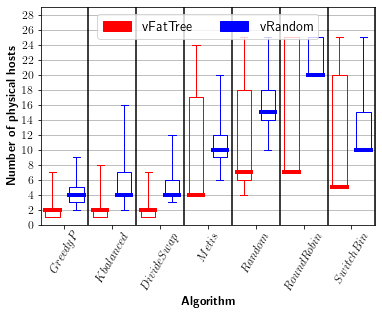

In [30]:
fattree = [fattree_eg_solved,fattree_eb_solved,fattree_ep_solved,fattree_metis_solved,fattree_random_solved,fattree_roundrobin_solved,fattree_switchBin_solved]
random = [random_eg_solved,random_eb_solved,random_ep_solved,random_metis_solved,random_random_solved,random_roundrobin_solved,random_switchBin_solved]

fattree_keys = [list(filter(lambda x:x in fattree_instances_with_solution_for_all,solved)) for solved in fattree]
random_keys = [list(filter(lambda x:x in random_instances_with_solution_for_all,solved)) for solved in random]
fattree_values = [[fattree_cleaned_data[x].EMBEDGREEDY_HOSTS for x in fattree_keys[0]],
                  [fattree_cleaned_data[x].EMBEDBALANCED_HOSTS for x in fattree_keys[1]],
                  [fattree_cleaned_data[x].EMBEDPARTITION_HOSTS for x in fattree_keys[2]],
                  [fattree_cleaned_data[x].METIS_HOSTS for x in fattree_keys[3]],
                  [fattree_cleaned_data[x].RANDOM_HOSTS for x in fattree_keys[4]],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOSTS for x in fattree_keys[5]],
                  [fattree_cleaned_data[x].SWITCHBIN_HOSTS for x in fattree_keys[6]]]

random_values = [[random_cleaned_data[x].EMBEDGREEDY_HOSTS for x in random_keys[0]],
                  [random_cleaned_data[x].EMBEDBALANCED_HOSTS for x in random_keys[1]],
                  [random_cleaned_data[x].EMBEDPARTITION_HOSTS for x in random_keys[2]],
                  [random_cleaned_data[x].METIS_HOSTS for x in random_keys[3]],
                  [random_cleaned_data[x].RANDOM_HOSTS for x in random_keys[4]],
                  [random_cleaned_data[x].ROUNDROBIN_HOSTS for x in random_keys[5]],
                  [random_cleaned_data[x].SWITCHBIN_HOSTS for x in random_keys[6]]]

import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

#PARTITION = DivideSwap
#GREEDY = GreedyP
#BALANCED = K-balanced

ticks = ["GreedyP","Kbalanced","DivideSwap","Metis","Random","RoundRobin","SwitchBin"]

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
color_b1="red"
color_b2="blue"


fig, ax = plt.subplots()
b1 = plt.boxplot(fattree_values, positions=np.array(range(len(fattree_values)))*2.0-0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b1),
            capprops=dict(color=color_b1),
            whiskerprops=dict(color=color_b1),
            flierprops=dict(color=color_b1, markeredgecolor=color_b1),
            medianprops=dict(color=color_b1,linewidth=4))
b2 = plt.boxplot(random_values, positions=np.array(range(len(random_values)))*2.0+0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b2),
            capprops=dict(color=color_b2),
            whiskerprops=dict(color=color_b2),
            flierprops=dict(color=color_b2, markeredgecolor=color_b2),
            medianprops=dict(color=color_b2,linewidth=4))


# draw temporary red and blue lines and use them to create a legend
ax.tick_params(axis='x', rotation=60)
plt.xticks(range(0, len(ticks) * 2 + 2, 2), ticks)
plt.tick_params(axis='both', labelsize=12)

plt.yticks(range(0, 26), range(0, 26))

plt.ylabel(r'\textbf{Number of physical hosts}', fontsize=12)
plt.xlabel(r'\textbf{Algorithm}', fontsize=12)

plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

for i in range(0,len(ticks)*2,2):
    plt.axvline(x=i+1,color="black")
    
plt.tick_params(axis='x', rotation=60)
plt.grid(axis='y')
plt.xlim(-1, 13)
plt.ylim(0, 29)
plt.yticks(list(range(0,30,2)), [f'${i}$' for i in range(0,30,2)])

lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="vFatTree")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="vRandom")
lables_patchs.append(add_patch)
lables = ["vFatTree","vRandom"]

plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")

plt.savefig('Rennes_solutions_all_algo.pdf',bbox_inches='tight')
#plt.show()
#plt.yscale("log")

<Figure size 960x480 with 0 Axes>

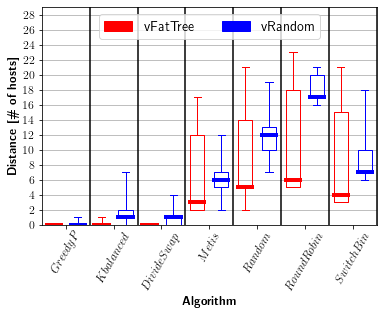

In [31]:
fattree_keys = [list(filter(lambda x:x in fattree_instances_with_solution_for_all,solved)) for solved in fattree]
random_keys = [list(filter(lambda x:x in random_instances_with_solution_for_all,solved)) for solved in random]
fattree_values = [[fattree_cleaned_data[x].EMBEDGREEDY_HOSTS for x in sorted(fattree_keys[0])],
                  [fattree_cleaned_data[x].EMBEDBALANCED_HOSTS for x in sorted(fattree_keys[1])],
                  [fattree_cleaned_data[x].EMBEDPARTITION_HOSTS for x in sorted(fattree_keys[2])],
                  [fattree_cleaned_data[x].METIS_HOSTS for x in sorted(fattree_keys[3])],
                  [fattree_cleaned_data[x].RANDOM_HOSTS for x in sorted(fattree_keys[4])],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOSTS for x in sorted(fattree_keys[5])],
                  [fattree_cleaned_data[x].SWITCHBIN_HOSTS for x in sorted(fattree_keys[6])]]

for i in range(0,len(fattree_values[0])):
    minimum_solution = min([fattree_values[j][i] for j in range(0,len(fattree_values))])
    for j in range(0,len(fattree_values)):
        fattree_values[j][i] -= minimum_solution



random_values = [[random_cleaned_data[x].EMBEDGREEDY_HOSTS for x in random_keys[0]],
                  [random_cleaned_data[x].EMBEDBALANCED_HOSTS for x in random_keys[1]],
                  [random_cleaned_data[x].EMBEDPARTITION_HOSTS for x in random_keys[2]],
                  [random_cleaned_data[x].METIS_HOSTS for x in random_keys[3]],
                  [random_cleaned_data[x].RANDOM_HOSTS for x in random_keys[4]],
                  [random_cleaned_data[x].ROUNDROBIN_HOSTS for x in random_keys[5]],
                  [random_cleaned_data[x].SWITCHBIN_HOSTS for x in random_keys[6]]]



for i in range(0,len(random_values[0])):
    minimum_solution = min([random_values[j][i] for j in range(0,len(random_values))])
    for j in range(0,len(random_values)): 
        random_values[j][i] -= minimum_solution


import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

#PARTITION = DivideSwap
#GREEDY = GreedyP
#BALANCED = K-balanced
color_b1="red"
color_b2="blue"



ticks = ["GreedyP","Kbalanced","DivideSwap","Metis","Random","RoundRobin","SwitchBin"]

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
b1 = plt.boxplot(fattree_values, positions=np.array(range(len(fattree_values)))*2.0-0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b1),
            capprops=dict(color=color_b1),
            whiskerprops=dict(color=color_b1),
            flierprops=dict(color=color_b1, markeredgecolor=color_b1),
            medianprops=dict(color=color_b1,linewidth=4))
b2 = plt.boxplot(random_values, positions=np.array(range(len(random_values)))*2.0+0.5, sym='', widths=0.6,whis=[0,100],boxprops=dict(color=color_b2),
            capprops=dict(color=color_b2),
            whiskerprops=dict(color=color_b2),
            flierprops=dict(color=color_b2, markeredgecolor=color_b2),
            medianprops=dict(color=color_b2,linewidth=4))



# draw temporary red and blue lines and use them to create a legend
ax.tick_params(axis='x', rotation=60)
plt.xticks(range(0, len(ticks) * 2 + 2, 2), ticks)
plt.tick_params(axis='both', labelsize=12)

plt.yticks(range(0, 26), range(0, 26))

plt.ylabel(r'\textbf{Distance [\# of hosts]}', fontsize=12)
plt.xlabel(r'\textbf{Algorithm}', fontsize=12)

plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

for i in range(0,len(ticks)*2,2):
    plt.axvline(x=i+1,color="black")
    
plt.tick_params(axis='x', rotation=60)
plt.grid(axis='y')
plt.xlim(-1, 13)
plt.ylim(0, 29)
plt.yticks(list(range(0,30,2)), [f'${i}$' for i in range(0,30,2)])


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="vFatTree")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="vRandom")
lables_patchs.append(add_patch)
lables = ["vFatTree","vRandom"]

plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")

plt.savefig('Rennes_distances_all_algo.pdf',bbox_inches='tight')
#plt.show()
#plt.yscale("log")

[54.43234836702955, 54.6850699844479, 26.283048211508554, 58.12597200622084]


<Figure size 960x480 with 0 Axes>

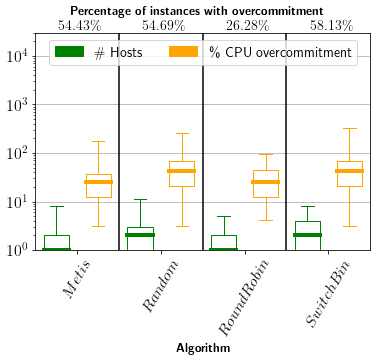

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% CPU overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% CPU overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Rennes_CPU_overcommitment.pdf',bbox_inches='tight')

[18.215396578538105, 39.0357698289269, 26.0303265940902, 27.954898911353034]


<Figure size 960x480 with 0 Axes>

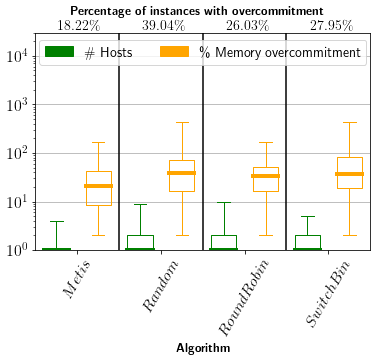

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Memory overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% Memory overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Rennes_Memory_overcommitment.pdf',bbox_inches='tight')


#plt.show()

[21.870139968895803, 69.57620528771385, 58.53421461897356, 51.26360808709176]


<Figure size 960x480 with 0 Axes>

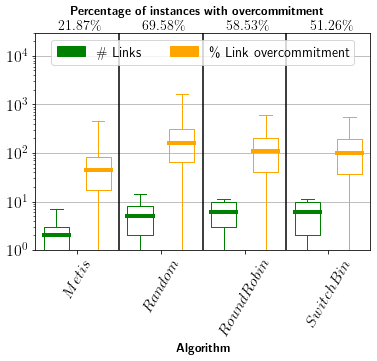

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]
#print(n_cpu[0])




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Links")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Link overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Links","\% Link overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Rennes_Link_overcommitment.pdf',bbox_inches='tight')




In [35]:
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np
import csv
from copy import deepcopy

algorithms= ["Metis", "EmbedBalanced", "EmbedPartition",
             "EmbedGreedy", "RandomPlacer","RoundRobin",
             "SwitchBinPlacer"]
labels = ['K', 'CORES','MEMORY','RATE','DENSITY',
                   "EMBEDGREEDY_HOSTS", "EMBEDBALANCED_HOSTS", "EMBEDPARTITION_HOSTS", "METIS_HOSTS",
                  "METIS_HOST_CPU_OVERCOMMITMENT", "METIS_HOST_MEMORY_OVERCOMMITMENT", "METIS_HOST_LINK_OVERCOMMITMENT","METIS_MAX_CPU_OVERCOMMITMENT", "METIS_MAX_MEMORY_OVERCOMMITMENT", "METIS_MAX_LINK_OVERCOMMITMENT",
                  "RANDOM_HOSTS","RANDOM_HOST_CPU_OVERCOMMITMENT", "RANDOM_HOST_MEMORY_OVERCOMMITMENT", "RANDOM_HOST_LINK_OVERCOMMITMENT","RANDOM_MAX_CPU_OVERCOMMITMENT", "RANDOM_MAX_MEMORY_OVERCOMMITMENT", "RANDOM_MAX_LINK_OVERCOMMITMENT",
                  "ROUNDROBIN_HOSTS","ROUNDROBIN_HOST_CPU_OVERCOMMITMENT", "ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_HOST_LINK_OVERCOMMITMENT","ROUNDROBIN_MAX_CPU_OVERCOMMITMENT", "ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_MAX_LINK_OVERCOMMITMENT",
                  "SWITCHBIN_HOSTS", "SWITCHBIN_HOST_CPU_OVERCOMMITMENT", "SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT", "SWITCHBIN_HOST_LINK_OVERCOMMITMENT","SWITCHBIN_MAX_CPU_OVERCOMMITMENT", "SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT", "SWITCHBIN_MAX_LINK_OVERCOMMITMENT"]







experiment_key = namedtuple("experiment_key", labels[:5])
experiment_results= namedtuple("experiment_results", labels[5:])
e=experiment_key(2,2,4,2,2)
clened_data={}
with open('pkl/gros_forcing_hosts_fattree.csv') as File:
    reader = csv.reader(File, delimiter=';', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    
    for row in list(reader)[1:]:
        #print(row)
        key_= experiment_key(*[int(float(i.replace(",","."))) for i in row[:5]])
        #print(key_)
        results_ = experiment_results(*[float(i.replace(",",".")) if i!="" and float(i.replace(",",".")) >= 0 else -1 for i in row[5:]])
        #print(results_)
        clened_data[key_]=results_

filtered_data=dict()
for key in clened_data.keys():
    if clened_data[key].EMBEDGREEDY_HOSTS>0:
        filtered_data[key]=clened_data[key]
print(len(clened_data.keys()))

print(len(filtered_data.keys()))
fattree_cleaned_data=clened_data

525
525


In [36]:
print("Embedded Greedy solved")
fattree_eg_solved=list(filter(lambda x:clened_data[x].EMBEDGREEDY_HOSTS>0, clened_data.keys()))
print(len(fattree_eg_solved))
print("-------------------------")


print("Metis solved without overcommitment")
fattree_metis_solved=list(filter(lambda x:clened_data[x].METIS_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_metis_solved))
print("-------------------------")

print("Random solved without overcommitment")
fattree_random_solved=list(filter(lambda x:clened_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_random_solved))
print("-------------------------")

print("RoundRobin solved without overcommitment")
fattree_roundrobin_solved = list(filter(lambda x:clened_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_roundrobin_solved))
print("-------------------------")

print("SwitchBin solved without overcommitment")
fattree_switchBin_solved = list(filter(lambda x:clened_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(fattree_switchBin_solved))
print("-------------------------")

print("All solution Marged")
fattree_all_solution_marged=set(fattree_eg_solved+fattree_metis_solved+fattree_random_solved+fattree_roundrobin_solved+fattree_switchBin_solved)
print(len(fattree_all_solution_marged))
print("-------------------------")

print("All solution with solution for all the algos")
fattree_instances_with_solution_for_all= fattree_all_solution_marged.intersection(set(fattree_eg_solved),set(fattree_metis_solved),set(fattree_random_solved),set(fattree_roundrobin_solved),set(fattree_switchBin_solved))
print(len(fattree_instances_with_solution_for_all))
print("-------------------------")

print("Embedded Greedy solved %")
print(len(fattree_eg_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")


print("Metis solved %")
print(len(fattree_metis_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("Random solved %")
print(len(fattree_random_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("RoundRobin solved %")
print(len(fattree_roundrobin_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("SwitchBin solved %")
print(len(fattree_switchBin_solved)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

print("All algo solved %")
print(len(fattree_instances_with_solution_for_all)/len(fattree_all_solution_marged) * 100,"%")
print("-------------------------")

Embedded Greedy solved
525
-------------------------
Metis solved without overcommitment
312
-------------------------
Random solved without overcommitment
176
-------------------------
RoundRobin solved without overcommitment
506
-------------------------
SwitchBin solved without overcommitment
168
-------------------------
All solution Marged
525
-------------------------
All solution with solution for all the algos
123
-------------------------
Embedded Greedy solved %
100.0 %
-------------------------
Metis solved %
59.42857142857143 %
-------------------------
Random solved %
33.523809523809526 %
-------------------------
RoundRobin solved %
96.38095238095238 %
-------------------------
SwitchBin solved %
32.0 %
-------------------------
All algo solved %
23.42857142857143 %
-------------------------


[30.666666666666664, 53.9047619047619, 0.0, 58.666666666666664]


<Figure size 960x480 with 0 Axes>

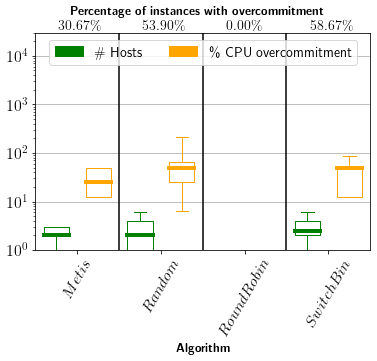

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% CPU overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% CPU overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Gros_CPU_Forced_overcommitment.pdf',bbox_inches='tight')

[9.333333333333334, 16.57142857142857, 0.0, 16.0]


<Figure size 960x480 with 0 Axes>

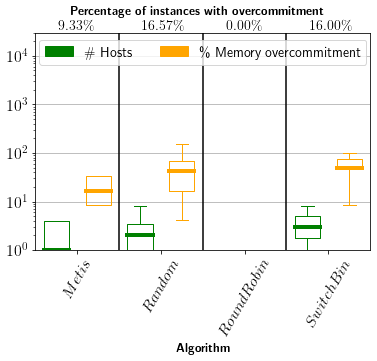

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Memory overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% Memory overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Gros_Memory_Forced_overcommitment.pdf',bbox_inches='tight')

[0.5714285714285714, 5.523809523809524, 3.619047619047619, 2.666666666666667]


<Figure size 960x480 with 0 Axes>

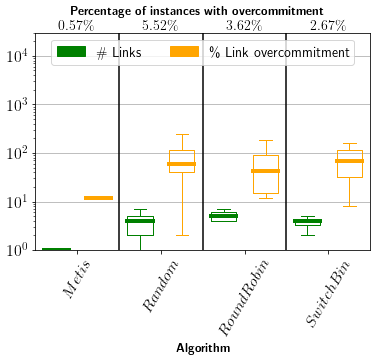

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]
#print(n_cpu[0])




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Links")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Link overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Links","\% Link overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Gros_Link_Forced_overcommitment.pdf',bbox_inches='tight')

In [40]:
import matplotlib.pyplot as plt
from collections import namedtuple
import numpy as np
import csv
from copy import deepcopy

algorithms= ["Metis", "EmbedBalanced", "EmbedPartition",
             "EmbedGreedy", "RandomPlacer","RoundRobin",
             "SwitchBinPlacer"]

labels = ['N', 'DENSITY', 'SEED',
                   "EMBEDGREEDY_HOSTS", "EMBEDBALANCED_HOSTS", "EMBEDPARTITION_HOSTS", "METIS_HOSTS",
                  "METIS_HOST_CPU_OVERCOMMITMENT", "METIS_HOST_MEMORY_OVERCOMMITMENT", "METIS_HOST_LINK_OVERCOMMITMENT","METIS_MAX_CPU_OVERCOMMITMENT", "METIS_MAX_MEMORY_OVERCOMMITMENT", "METIS_MAX_LINK_OVERCOMMITMENT",
                  "RANDOM_HOSTS","RANDOM_HOST_CPU_OVERCOMMITMENT", "RANDOM_HOST_MEMORY_OVERCOMMITMENT", "RANDOM_HOST_LINK_OVERCOMMITMENT","RANDOM_MAX_CPU_OVERCOMMITMENT", "RANDOM_MAX_MEMORY_OVERCOMMITMENT", "RANDOM_MAX_LINK_OVERCOMMITMENT",
                  "ROUNDROBIN_HOSTS","ROUNDROBIN_HOST_CPU_OVERCOMMITMENT", "ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_HOST_LINK_OVERCOMMITMENT","ROUNDROBIN_MAX_CPU_OVERCOMMITMENT", "ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT", "ROUNDROBIN_MAX_LINK_OVERCOMMITMENT",
                  "SWITCHBIN_HOSTS", "SWITCHBIN_HOST_CPU_OVERCOMMITMENT", "SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT", "SWITCHBIN_HOST_LINK_OVERCOMMITMENT","SWITCHBIN_MAX_CPU_OVERCOMMITMENT", "SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT", "SWITCHBIN_MAX_LINK_OVERCOMMITMENT"]




experiment_key = namedtuple("experiment_key", labels[:3])
experiment_results= namedtuple("experiment_results", labels[3:])
e=experiment_key(2,0.1,4)
clened_data={}
with open('pkl/gros_forcing_hosts_random.csv') as File:
    reader = csv.reader(File, delimiter=';', quotechar=',', quoting=csv.QUOTE_MINIMAL)
    
    for row in list(reader)[1:]:
        #print(row)
        key_= experiment_key(*[float(i.replace(",",".")) for i in row[:3]])
        #print(key_)
        results_ = experiment_results(*[float(i.replace(",",".")) if float(i.replace(",",".")) >= 0 else -1 for i in row[3:]])
        #print(results_)
        clened_data[key_]=results_

filtered_data=dict()
for key in clened_data.keys():
    if clened_data[key].EMBEDGREEDY_HOSTS>0:
        filtered_data[key]=clened_data[key]
print(len(clened_data.keys()))

print(len(filtered_data.keys()))

random_cleaned_data=clened_data

4500
4500


In [41]:
print("Embedded Greedy solved")
random_eg_solved=list(filter(lambda x:clened_data[x].EMBEDGREEDY_HOSTS>0, clened_data.keys()))
print(len(random_eg_solved))
print("-------------------------")

print("Embedded Balanced solved")
random_eb_solved=list(filter(lambda x:clened_data[x].EMBEDBALANCED_HOSTS>0, clened_data.keys()))
print(len(random_eb_solved))
print("-------------------------")

print("Embedded Partition solved")
random_ep_solved=list(filter(lambda x:clened_data[x].EMBEDPARTITION_HOSTS>0, clened_data.keys()))
print(len(random_ep_solved))
print("-------------------------")

print("Metis solved without overcommitment")
random_metis_solved=list(filter(lambda x:clened_data[x].METIS_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].METIS_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_metis_solved))
print("-------------------------")

print("Random solved without overcommitment")
random_random_solved=list(filter(lambda x:clened_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_random_solved))
print("-------------------------")

print("RoundRobin solved without overcommitment")
random_roundrobin_solved = list(filter(lambda x:clened_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_roundrobin_solved))
print("-------------------------")

print("SwitchBin solved without overcommitment")
random_switchBin_solved = list(filter(lambda x:clened_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT==0.0 and clened_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT==0.0, clened_data.keys()))
print(len(random_switchBin_solved))
print("-------------------------")

print("All solution Marged")
random_all_solution_marged=set(random_eg_solved+random_eb_solved+random_ep_solved+random_metis_solved+random_random_solved+random_roundrobin_solved+random_switchBin_solved)
print(len(random_all_solution_marged))
print("-------------------------")

print("All solution with solution for all the algos")
random_instances_with_solution_for_all= random_all_solution_marged.intersection(set(random_eg_solved),set(random_eb_solved),set(random_ep_solved),set(random_metis_solved),set(random_random_solved),set(random_roundrobin_solved),set(random_switchBin_solved))
print(len(random_instances_with_solution_for_all))
print("-------------------------")



print("Embedded Greedy solved %")
print(len(random_eg_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Balanced solved %")
print(len(random_eb_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Embedded Partition solved %")
print(len(random_ep_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Metis solved %")
print(len(random_metis_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("Random solved %")
print(len(random_random_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("RoundRobin solved %")
print(len(random_roundrobin_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("SwitchBin solved %")
print(len(random_switchBin_solved)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

print("All algo solved %")
print(len(random_instances_with_solution_for_all)/len(random_all_solution_marged) * 100,"%")
print("-------------------------")

Embedded Greedy solved
4500
-------------------------
Embedded Balanced solved
0
-------------------------
Embedded Partition solved
0
-------------------------
Metis solved without overcommitment
248
-------------------------
Random solved without overcommitment
122
-------------------------
RoundRobin solved without overcommitment
532
-------------------------
SwitchBin solved without overcommitment
63
-------------------------
All solution Marged
4500
-------------------------
All solution with solution for all the algos
0
-------------------------
Embedded Greedy solved %
100.0 %
-------------------------
Embedded Balanced solved %
0.0 %
-------------------------
Embedded Partition solved %
0.0 %
-------------------------
Metis solved %
5.511111111111111 %
-------------------------
Random solved %
2.711111111111111 %
-------------------------
RoundRobin solved %
11.822222222222223 %
-------------------------
SwitchBin solved %
1.4000000000000001 %
-------------------------
All algo

[87.82089552238807, 92.75621890547264, 78.94527363184079, 94.40796019900498]


<Figure size 960x480 with 0 Axes>

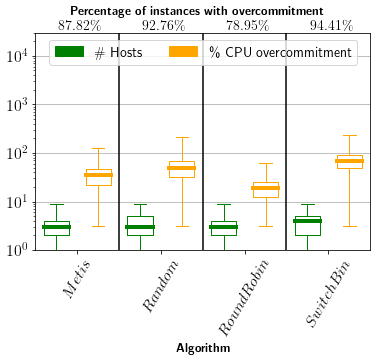

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_CPU_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_CPU_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% CPU overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% CPU overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Gros_CPU_overcommitment_forced_all.pdf',bbox_inches='tight')

[2.3482587064676617, 8.0, 0.05970149253731343, 18.00995024875622]


<Figure size 960x480 with 0 Axes>

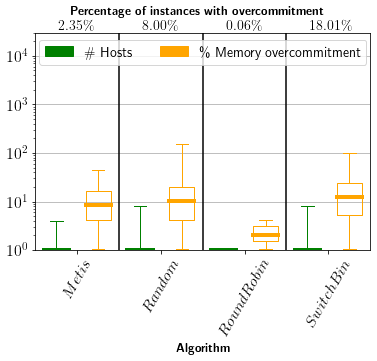

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_MEMORY_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Hosts")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Memory overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Hosts","\% Memory overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)



plt.savefig('Gros_Memory_overcommitment_forced_all.pdf',bbox_inches='tight')


#plt.show()

[0.05970149253731343, 0.5771144278606966, 0.3781094527363184, 0.27860696517412936]


<Figure size 960x480 with 0 Axes>

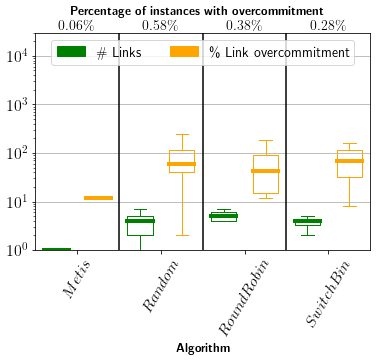

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
SPINE_COLOR = 'gray'
import matplotlib.patches as mpatches

n_cpu = [
                  [fattree_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_HOST_LINK_OVERCOMMITMENT for x in random_all_solution_marged]]

n_cpu=[list(filter(lambda x: x>0, l))for l in n_cpu]
#print(n_cpu[0])




max_cpu = [
                  [fattree_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].METIS_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].RANDOM_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].ROUNDROBIN_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged],
                  [fattree_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in fattree_all_solution_marged]+[random_cleaned_data[x].SWITCHBIN_MAX_LINK_OVERCOMMITMENT for x in random_all_solution_marged]]

max_cpu=[list(filter(lambda x: x>0, l))for l in max_cpu]



ticks = ["Metis","Random","RoundRobin","SwitchBin"]




def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color,linewidth=4)

    
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()


b1 = plt.boxplot(n_cpu, positions=np.array(range(len(n_cpu)))*2.0-0.5, sym='', widths=0.6,whis=[0,100])
b2 = plt.boxplot(max_cpu, positions=np.array(range(len(n_cpu)))*2.0+0.5, sym='', widths=0.6,whis=[0,100])


color_b1="green"
color_b2="orange"

set_box_color(b1, color_b1) # colors are from http://colorbrewer2.org/
set_box_color(b2, color_b2)
ax.tick_params(axis='x', rotation=60)



plt.axvline(x=1,color="black")
plt.axvline(x=3,color="black")
plt.axvline(x=5,color="black")


plt.xticks(list(range(0,len(ticks)*2+2,2)), [f'${i}$' for i in ticks])

plt.tick_params(axis='both', labelsize=16)

plt.grid(axis='y')
plt.xlim(-1, 7)
plt.ylim(1, 30000)
plt.yscale("log")


lables_patchs = []
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

add_patch = mpatches.Patch(color=color_b1, label="\# Links")
lables_patchs.append(add_patch)

add_patch = mpatches.Patch(color=color_b2, label="\% Link overcommitment")
lables_patchs.append(add_patch)
lables = ["\# Links","\% Link overcommitment"]

plt.xlabel(r'\textbf{Algorithm}', fontsize=12)
plt.legend(lables_patchs,lables, fontsize=14, ncol=2, loc="upper center")


ncpu_percentage = [len(x) for x in n_cpu]
total_solutions = len(random_all_solution_marged) + len(fattree_all_solution_marged)
ncpu_percentage = [(x/total_solutions)*100 for x in ncpu_percentage]
print(ncpu_percentage)
font.update({'size':14})
for c,x in enumerate(ncpu_percentage):
    plt.text((c*2) - 0.45 , 35000, r'${:.2f}\%$'.format(x), fontdict=font)

font.update({'size':12})
plt.text(-0.15, 70000, r'\textbf{Percentage of instances with overcommitment}', fontdict=font)





plt.savefig('Gros_Link_overcommitment_forced_all.pdf',bbox_inches='tight')